In [1]:
from quake import quake_heap
from fibheap import Fib_Heap
import random
from collections import defaultdict
import time

In [2]:
def get_elem(max_elem = 10**6, min_elem = -10**6):
    return random.randrange(min_elem, max_elem)

In [3]:
def generate_copies(num_elems, max_elem = 10**6):
    if num_elems > max_elem:
        num_elems = max_elem
    q = quake_heap()
    f = Fib_Heap()
    q_elems = []
    f_elems = []
    for i in range(num_elems + 1):
        elem = get_elem()
        q_elems.append(q.pq_insert(elem, elem))
        f_elems.append(f.pq_insert(f, elem, elem))
    q.pq_delete_min()
    f.pq_delete_min(f)
    return q, f, q_elems, f_elems

In [28]:
q = quake_heap()
f = Fib_Heap()
num_iterations = 5000
q_elems = []
f_elems = []
functions = ['insert', 'delete-min', 'decrease-key', 'meld']

total_times_q = defaultdict(list)
total_times_f = defaultdict(list)
counts = defaultdict(int)

for i in range(num_iterations):
    fn = random.choices(functions, weights=[50, 25, 50, 1])[0]
    if i % 100 == 0:
        print(i)
    
    if fn == 'insert':
        elem = get_elem()
        
        # quake insert
        start_q = time.time_ns()
        q_elems.append(q.pq_insert(elem, elem))
        end_q = time.time_ns()

        
        # fib insert
        start_f = time.time_ns()
        f_elems.append(f.pq_insert(f, elem, elem))
        end_f = time.time_ns()
 
    
        
    elif fn == 'delete-min':
        if len(q_elems) <= 0:
            continue
            
        q_elems.sort(reverse = True, key=lambda x: x.key)
        f_elems.sort(reverse = True, key=lambda x: x.key)
        q_elems.pop()
        f_elems.pop()
        
        start_q = time.time_ns()
        q.pq_delete_min()
        end_q = time.time_ns()
        
        start_f = time.time_ns()
        f.pq_delete_min(f)
        end_f = time.time_ns()
        
        
    elif fn == 'decrease-key':
        if len(q_elems) <= 0:
            continue
            
        elem_index = random.randrange(len(q_elems))
        old_key = q_elems[elem_index].key
        new_key = random.randrange(old_key - 100, old_key)
        
        
        start_q = time.time_ns()
        q.pq_decrease_key(q_elems[0], new_key)
        end_q = time.time_ns()
        
        start_f = time.time_ns()
        f.pq_decrease_key(f, f_elems[0], new_key)
        end_f = time.time_ns()
        
    
    elif fn == 'meld':
        if len(q_elems) <= 0:
            continue
        new_q, new_f, new_q_elems, new_f_elems = generate_copies(random.randrange(0, len(q_elems)) + 1)
        q_elems.extend(new_q_elems)
        f_elems.extend(new_f_elems)
        
        start_q = time.time_ns()
        q.pq_meld(new_q)
        end_q = time.time_ns()
        
        start_f = time.time_ns()
        f.pq_meld(f, new_f)
        end_f = time.time_ns()
        
    counts[fn] += 1
    total_times_q[fn].append((end_q - start_q, q.size))
    total_times_f[fn].append((end_f - start_f, f.size))       

0
100


KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def dict_to_arr(d):
    return np.array(list(d.values()))

In [10]:
total_times_q_arr = []
total_times_f_arr = []
all_times_q = []
all_sizes_q = []
all_times_f = []
all_sizes_f = []
for op in total_times_q:
    times_q, sizes_q = zip(*total_times_q[op])
    times_f, sizes_f = zip(*total_times_f[op])
    total_times_q_arr.append(sum(times_q))
    total_times_f_arr.append(sum(times_f))
    all_times_q.append(times_q)
    all_times_f.append(times_f)
    all_sizes_q.append(sizes_q)
    all_sizes_f.append(sizes_f)

In [11]:
counts_arr = dict_to_arr(counts)

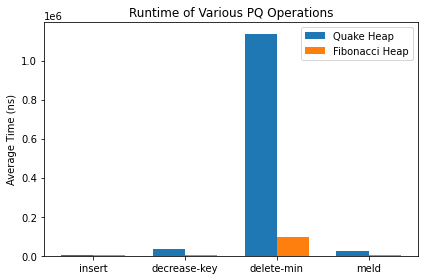

In [12]:
labels = list(counts.keys())
avg_times_q = total_times_q_arr/counts_arr
avg_times_f = total_times_f_arr/counts_arr

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_times_q, width, label='Quake Heap')
rects2 = ax.bar(x + width/2, avg_times_f, width, label='Fibonacci Heap')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Time (ns)')
ax.set_title('Runtime of Various PQ Operations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

[4288.693743139407, 35480.97967691506, 23843.75]

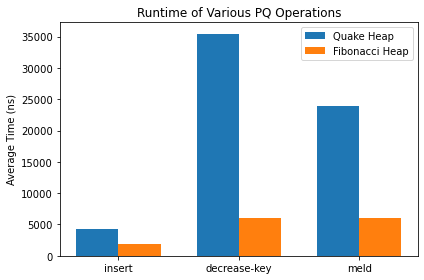

In [19]:
x = np.arange(len(labels)-1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [avg_times_q[0], avg_times_q[1], avg_times_q[3]], width, label='Quake Heap')
rects2 = ax.bar(x + width/2, [avg_times_f[0], avg_times_f[1], avg_times_f[3]], width, label='Fibonacci Heap')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Time (ns)')
ax.set_title('Runtime of Various PQ Operations')
ax.set_xticks(x)
ax.set_xticklabels([labels[0], labels[1], labels[3]])
ax.legend()

fig.tight_layout()

plt.show()

In [55]:
def plot_results(index):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    ax[0].set_title(f'Quake Heap "{labels[index]}" Runtime for various n')
    ax[0].set_ylabel('Runtime (ns)')
    ax[0].set_xlabel('n')
    ax[0].plot(all_sizes_q[index], all_times_q[index])
    ax[0].set_xscale('log')
    ax[1].set_title(f'Fibonacci Heap "{labels[index]}" Runtime for various n')
    ax[1].plot(all_sizes_f[index], all_times_f[index])
    ax[1].set_ylabel('Runtime (ns)')
    ax[1].set_xlabel('n')
    ax[1].set_xscale('log')
    plt.show()

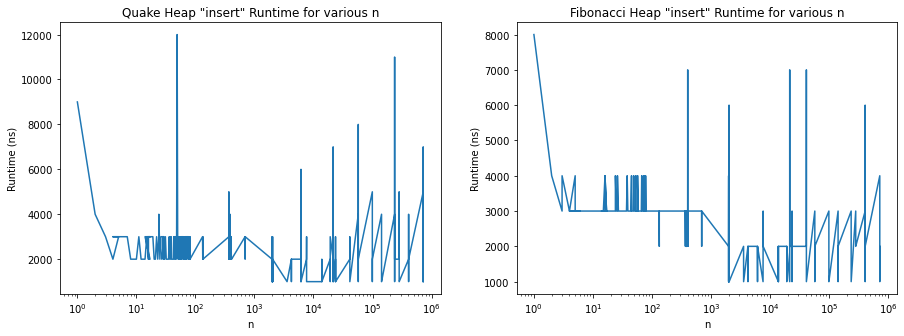

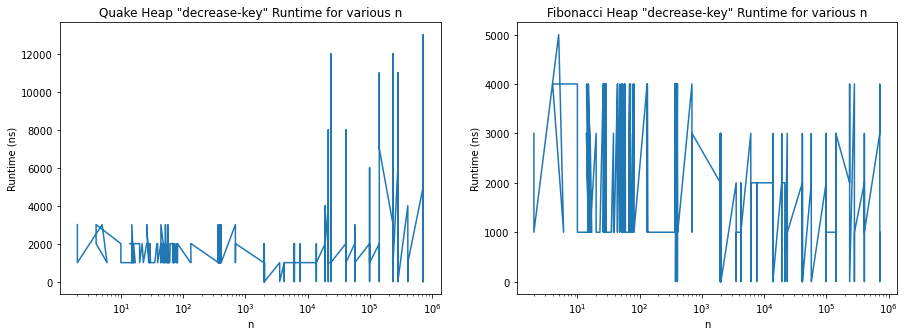

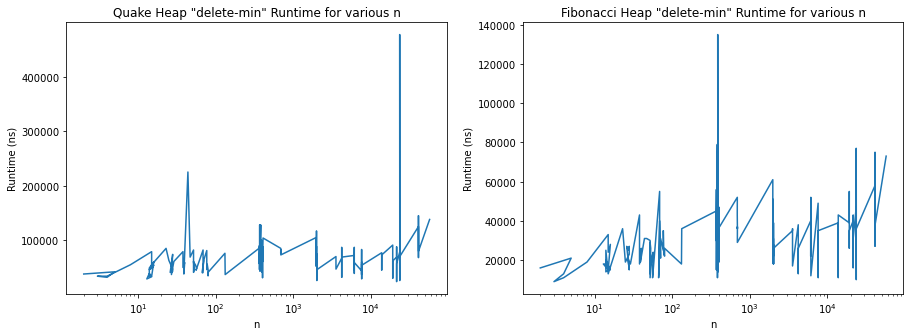

In [56]:
for i in range(len(labels)):
    plot_results(i)

In [47]:
def plot_range(start_range, end_range):
    avg_times_q = []
    avg_times_f = []
    
    for i in range(len(labels)):
        times_q = np.array(all_times_q[i])
        sizes_q = np.array(all_sizes_q[i])
        times_f = np.array(all_times_f[i])
        sizes_f = np.array(all_sizes_f[i])

        q_range = np.where(sizes_q[np.where(sizes_q >= start_range)] < end_range)
        f_range = np.where(sizes_f[np.where(sizes_f >= start_range)] < end_range)
        
        q_val = 0
        f_val = 0
        if (len(times_q[q_range]) > 0):
            q_val = sum(times_q[q_range])/len(times_q[q_range])
        if (len(times_f[f_range]) > 0):
            f_val = sum(times_f[f_range])/len(times_f[f_range])
            
        avg_times_q.append(q_val)
        avg_times_f.append(f_val)

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, avg_times_q, width, label='Quake Heap')
    rects2 = ax.bar(x + width/2, avg_times_f, width, label='Fibonacci Heap')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average Time (ns)')
    ax.set_title(f'Runtime of Various PQ Operations Size:{start_range} to {end_range}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

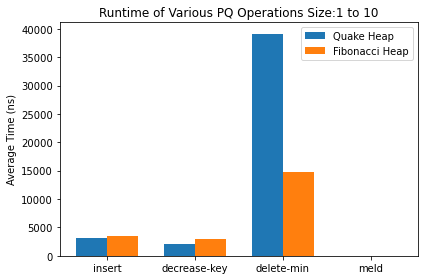

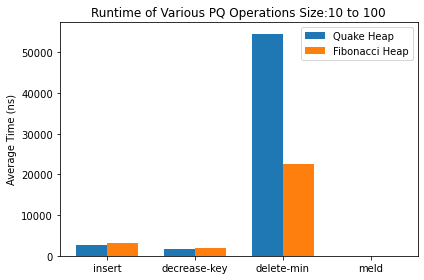

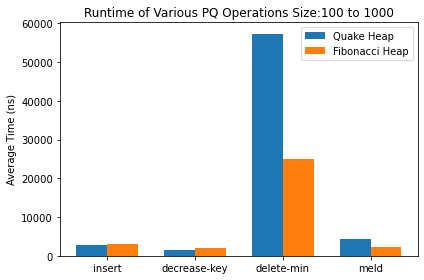

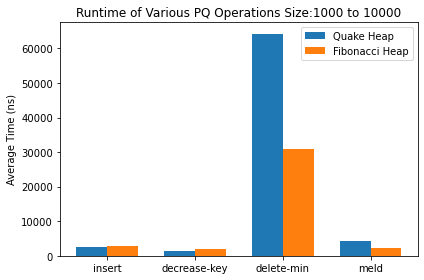

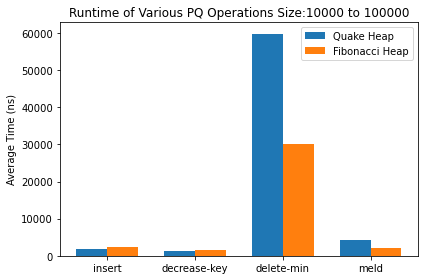

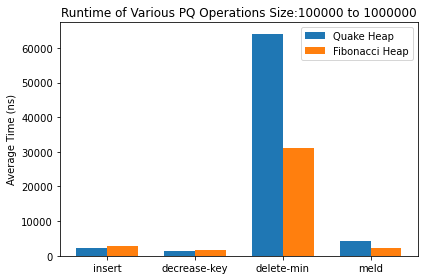

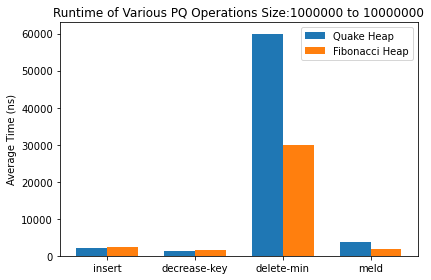

In [48]:
for i in range(7):
    plot_range(10**i, 10**(i+1))